# Using Machine Learning to Forecast Air Quality in Beijing

## 2 - Exploratory Data Analysis

### Import Python Packages

In [0]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import calendar
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
plt.style.use('fivethirtyeight')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Load cleaned data set

In [3]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/df_hourly.csv',
                 index_col=0,
                 parse_dates=[0],
                 date_parser=pd.to_datetime,
                 infer_datetime_format=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49056 entries, 2010-01-02 00:00:00 to 2015-12-31 23:00:00
Data columns (total 18 columns):
No                 49056 non-null int64
year               49056 non-null int64
month              49056 non-null int64
day                49056 non-null int64
hour               49056 non-null int64
season             49056 non-null int64
PM_Dongsi          25098 non-null float64
PM_Dongsihuan      23968 non-null float64
PM_Nongzhanguan    25098 non-null float64
pm25               49056 non-null float64
dew_point          49056 non-null float64
humidity           49056 non-null float64
pressure           49056 non-null float64
temp               49056 non-null float64
wind_dir           49052 non-null object
wind_speed         49056 non-null float64
precipitation      49056 non-null float64
Iprec              49056 non-null float64
dtypes: float64(11), int64(6), object(1)
memory usage: 7.1+ MB


In [4]:
df.head()

,No,year,month,day,hour,season,PM_Dongsi,PM_Dongsihuan,PM_Nongzhanguan,pm25,dew_point,humidity,pressure,temp,wind_dir,wind_speed,precipitation,Iprec
2010-01-02 00:00:00,25,2010,1,2,0,4,NaN,NaN,NaN,148.0,-16.0,38.0,1020.0,-4.0,SE,1.79,0.0,0.0
2010-01-02 01:00:00,26,2010,1,2,1,4,NaN,NaN,NaN,159.0,-15.0,42.0,1020.0,-4.0,SE,2.68,0.0,0.0
2010-01-02 02:00:00,27,2010,1,2,2,4,NaN,NaN,NaN,181.0,-11.0,63.5,1021.0,-5.0,SE,3.57,0.0,0.0
2010-01-02 03:00:00,28,2010,1,2,3,4,NaN,NaN,NaN,138.0,-7.0,85.0,1022.0,-5.0,SE,5.36,0.0,0.0
2010-01-02 04:00:00,29,2010,1,2,4,4,NaN,NaN,NaN,109.0,-7.0,85.0,1022.0,-5.0,SE,6.25,0.0,0.0


### Visualize daily PM2.5 over entire time span

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Air Quality, 2010-2015')

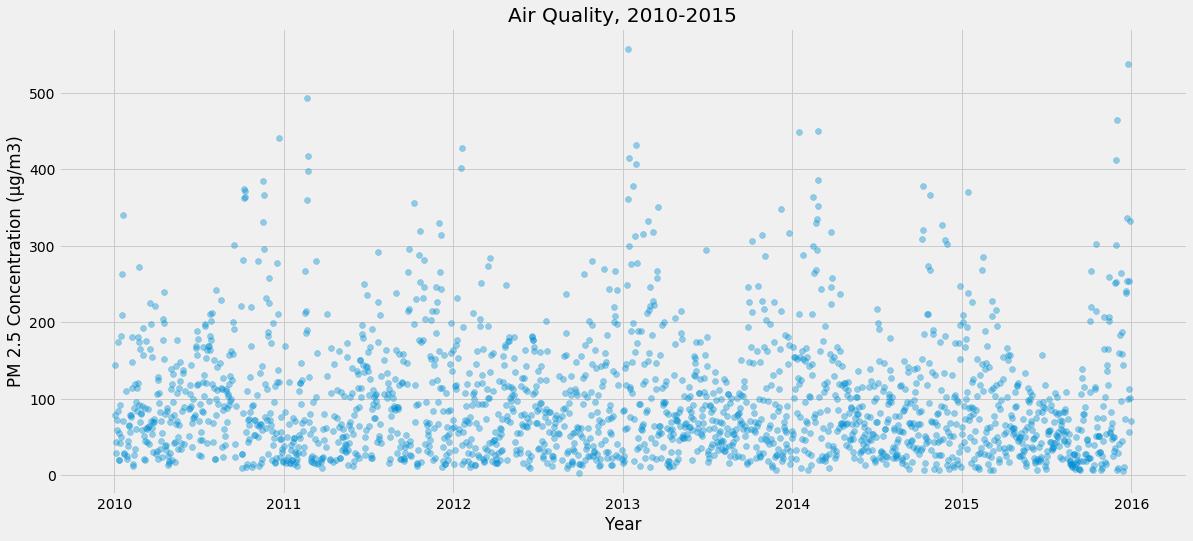

In [5]:
# Generate a simple scatter plot of daily mean PM2.5 concentration for entire time span
scatter_y = df.pm25.resample('D').mean()
scatter_x = df.pm25.resample('D').mean().index
#color = scatter_y

plt.scatter(x = scatter_x, y = scatter_y, alpha = 0.4)
plt.xlabel('Year')
plt.ylabel('PM 2.5 Concentration (μg/m3)')
plt.title('Air Quality, 2010-2015')

### Visualize distribution of PM2.5

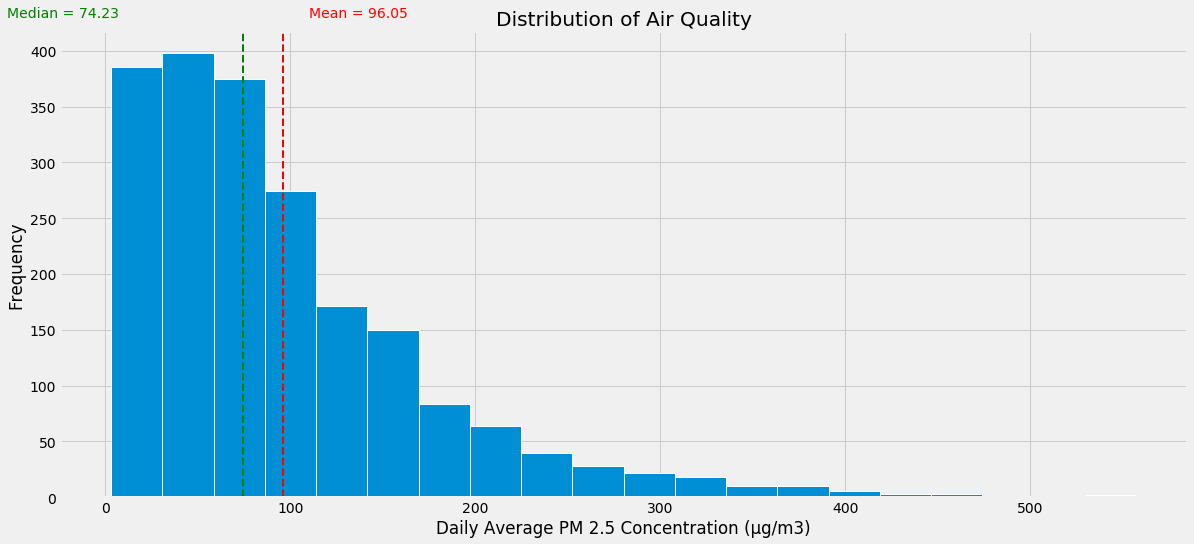

In [6]:
# Distribution of air quality for the period 2010-2015
plt.figure()
plt.hist(scatter_y.dropna(), bins = 20, edgecolor='w', lw=1)
plt.xlabel('Daily Average PM 2.5 Concentration (μg/m3)')
plt.ylabel('Frequency')
plt.title('Distribution of Air Quality')
plt.text(110, 430, 'Mean = ' + str(round(scatter_y.dropna().mean(),2)), color = 'red')
plt.text(-53, 430, 'Median = ' + str(round(scatter_y.dropna().median(),2)), color = 'green')
plt.axvline(scatter_y.dropna().mean(), color='r', linestyle='dashed', linewidth=2)
plt.axvline(scatter_y.dropna().median(), color='g', linestyle='dashed', linewidth=2)

### Visualize proportion of days characterized by each PM2.5 classification

Text(0.5, 1.0, 'Percentage of Days Within Each Air Quality Classification')

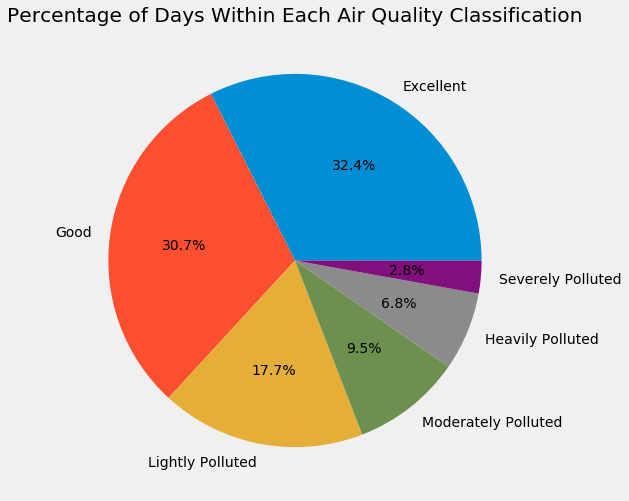

In [7]:
# Generate a pie chart to show portion of days falling into each air quality classification
excellent = len([ii for ii in scatter_y.dropna() if ii <= 50])
good = len([ii for ii in scatter_y.dropna() if ii > 50 and ii <= 100])
lightly = len([ii for ii in scatter_y.dropna() if ii > 100 and ii <= 150])
moderately = len([ii for ii in scatter_y.dropna() if ii > 150 and ii <= 200])
heavily = len([ii for ii in scatter_y.dropna() if ii > 200 and ii <= 300])
severely = len([ii for ii in scatter_y.dropna() if ii > 300])
sizes = [excellent, good, lightly, moderately, heavily, severely]
labels = ['Excellent','Good','Lightly Polluted','Moderately Polluted','Heavily Polluted','Severely Polluted']
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Percentage of Days Within Each Air Quality Classification')

### Visualize PM2.5 by month

([<matplotlib.axis.XTick at 0x7f398ef9cef0>,
 <a list of 12 Text xticklabel objects>)

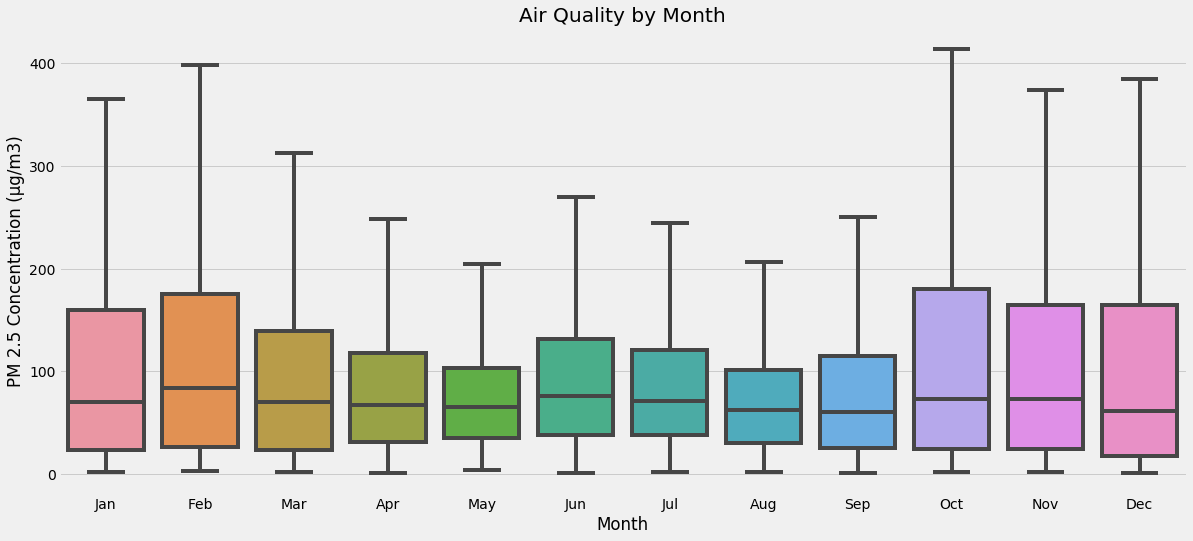

In [10]:
# Plot PM 2.5 level by MONTH
plt.figure()
sns.boxplot(x="month", y="pm25", data=df, showfliers=False)
plt.xlabel('Month')
plt.ylabel('PM 2.5 Concentration (μg/m3)')
plt.title('Air Quality by Month')
plt.xticks(range(0,12), calendar.month_abbr[1:13])

### Visualize PM2.5 by day of the week

([<matplotlib.axis.XTick at 0x7f398eeb7710>,
 <a list of 7 Text xticklabel objects>)

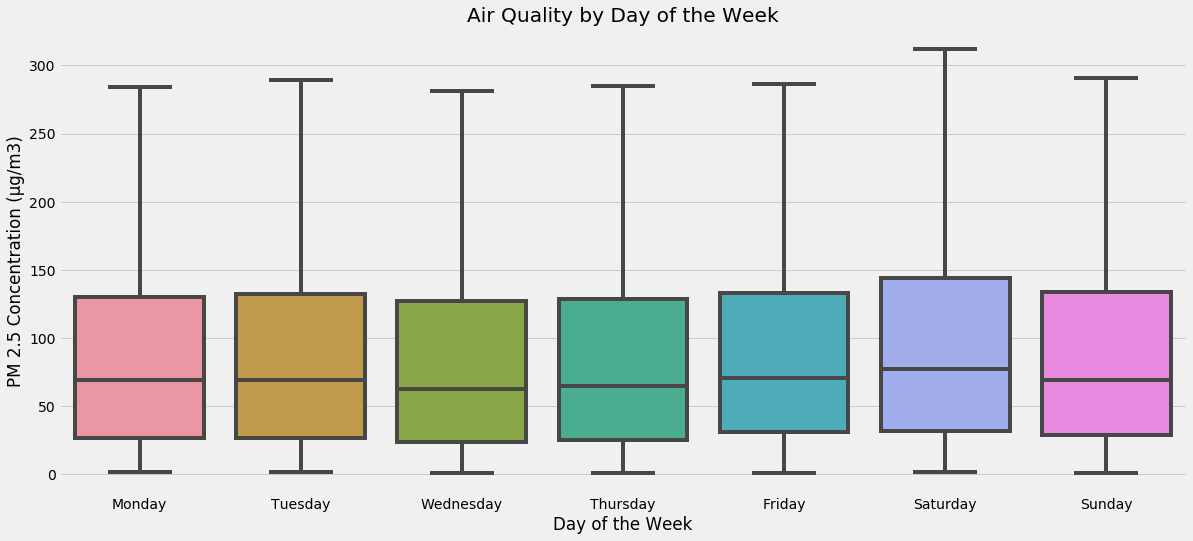

In [11]:
# Plot PM 2.5 level by DAY OF THE WEEK
df_length = df.shape[0]

weekday = []

for ii in list(range(df_length)):
    weekday.append(calendar.weekday(df.year[ii],
        df.month[ii], df.day[ii]))
    
df['weekday'] = weekday

plt.figure()
sns.boxplot(x="weekday", y="pm25", data=df, showfliers=False)
plt.xlabel('Day of the Week')
plt.ylabel('PM 2.5 Concentration (μg/m3)')
plt.title('Air Quality by Day of the Week')
plt.xticks(range(0,7), calendar.day_name)

### Visualize PM2.5 by hour of the day

Text(0.5, 1.0, 'Air Quality by Hour of the Day')

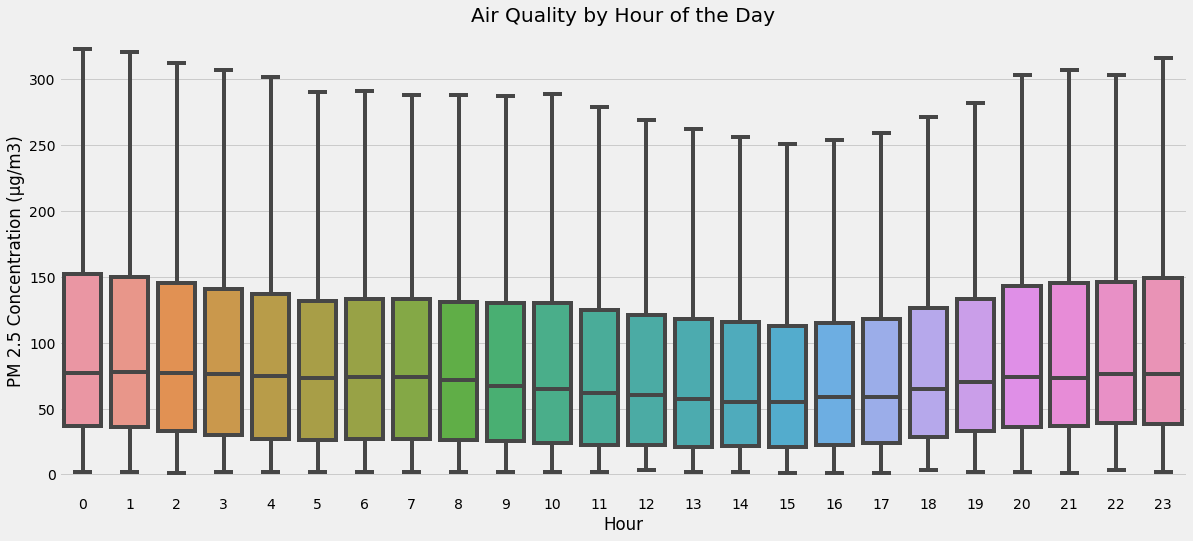

In [12]:
# Plot PM 2.5 level by HOUR OF THE DAY

plt.figure()
sns.boxplot(x="hour", y="pm25", data=df, showfliers=False)
plt.xlabel('Hour')
plt.ylabel('PM 2.5 Concentration (μg/m3)')
plt.title('Air Quality by Hour of the Day')

### Perform univariate analysis for all weather features 

Text(0.5, 1.0, 'Air Quality vs. Temperature')

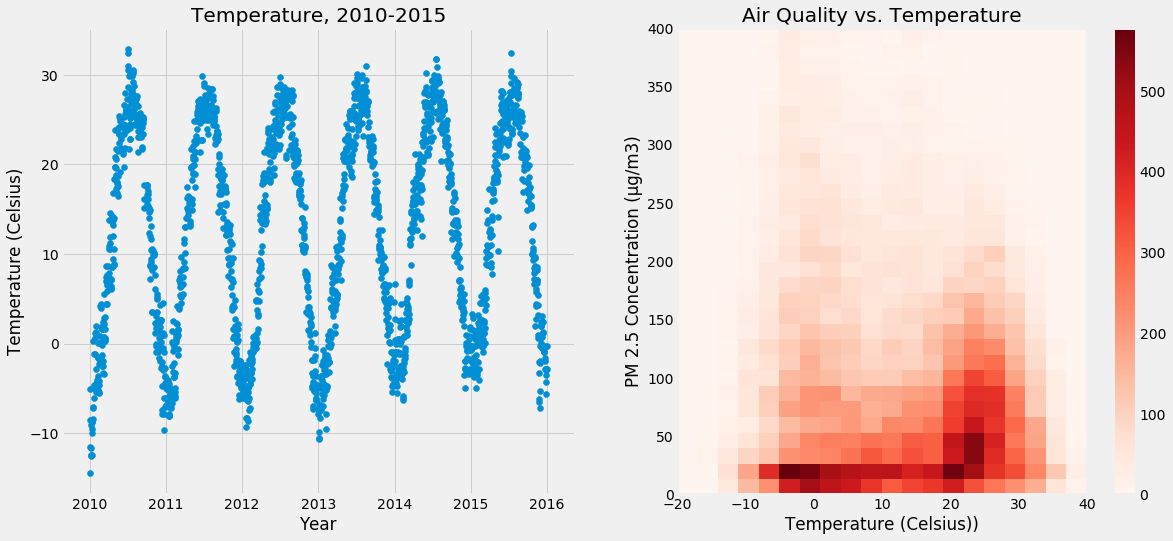

In [13]:
# Now we take a look at the other features apart from air concentration:

# Temperature

plt.figure()
plt.subplot(1,2,1)
plt.scatter(x = df.temp.resample('D').mean().index, y = df.temp.resample('D').mean())
plt.xlabel('Year')
plt.ylabel('Temperature (Celsius)')
plt.title('Temperature, 2010-2015')

plt.subplot(1,2,2)
plt.hist2d(x = df.temp, y = df.pm25, bins = (20, 30), range = ((-20,40),(0,400)), cmap = 'Reds')
plt.colorbar()
plt.xlabel('Temperature (Celsius))')
plt.ylabel('PM 2.5 Concentration (μg/m3)')
plt.title('Air Quality vs. Temperature')

Text(0.5, 1.0, 'Air Quality vs. Pressure')

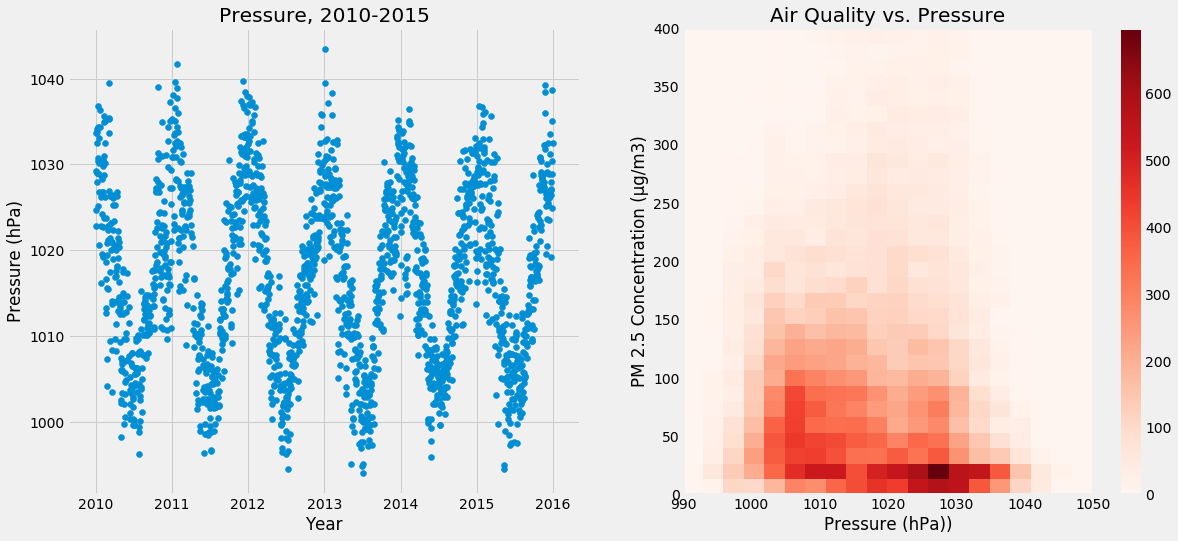

In [14]:
# Pressure

plt.figure()
plt.subplot(1,2,1)
plt.scatter(x = df.pressure.resample('D').mean().index, y = df.pressure.resample('D').mean())
plt.xlabel('Year')
plt.ylabel('Pressure (hPa)')
plt.title('Pressure, 2010-2015')

plt.subplot(1,2,2)
plt.hist2d(x = df.pressure, y = df.pm25, bins = (20, 30), range = ((990,1050),(0,400)), cmap = 'Reds')
plt.colorbar()
plt.xlabel('Pressure (hPa))')
plt.ylabel('PM 2.5 Concentration (μg/m3)')
plt.title('Air Quality vs. Pressure')

Text(0.5, 1.0, 'Air Quality vs. Humidity')

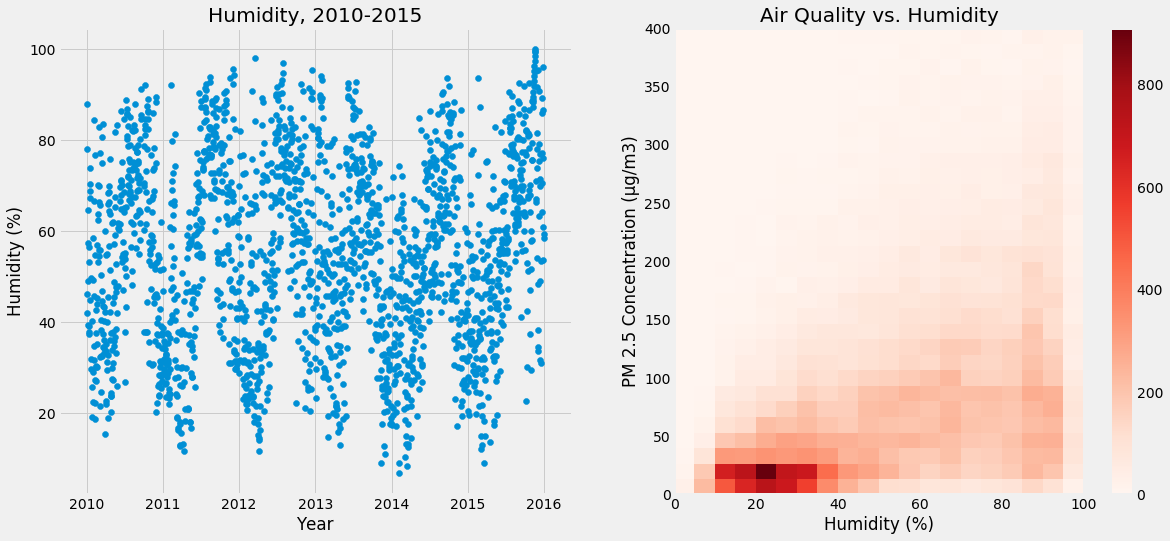

In [15]:
# Humidity

plt.figure()
plt.subplot(1,2,1)
plt.scatter(x = df.humidity.resample('D').mean().index, y = df.humidity.resample('D').mean())
plt.xlabel('Year')
plt.ylabel('Humidity (%)')
plt.title('Humidity, 2010-2015')

plt.subplot(1,2,2)
plt.hist2d(x = df.humidity, y = df.pm25, bins = (20, 30), range = ((0,100),(0,400)), cmap = 'Reds')
plt.colorbar()
plt.xlabel('Humidity (%)')
plt.ylabel('PM 2.5 Concentration (μg/m3)')
plt.title('Air Quality vs. Humidity')

Text(0.5, 1.0, 'Air Quality vs. Dew Point')

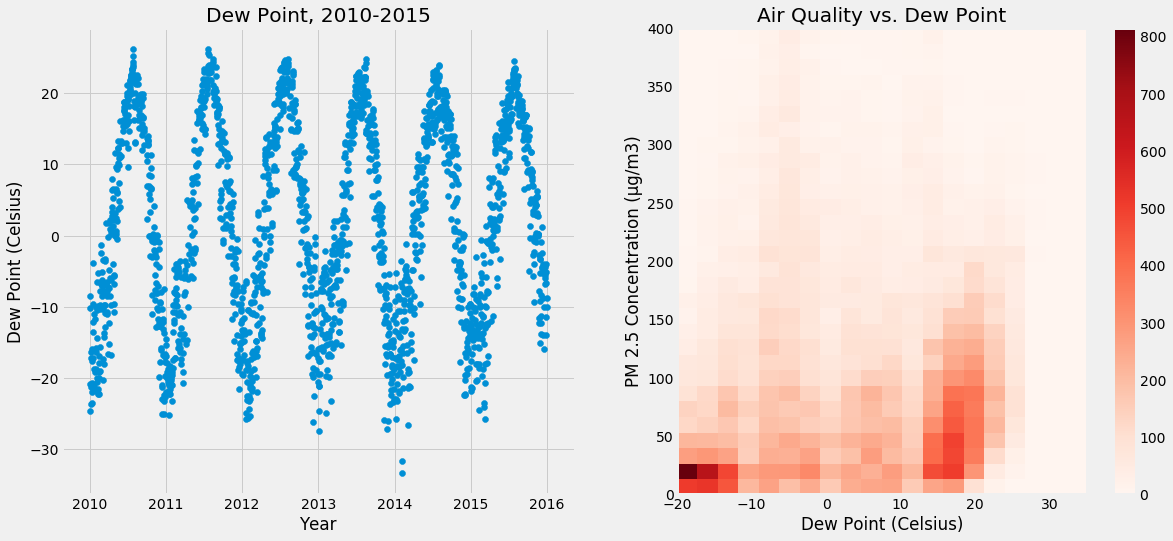

In [16]:
# Dew Point

plt.figure()
plt.subplot(1,2,1)
plt.scatter(x = df.dew_point.resample('D').mean().index, y = df.dew_point.resample('D').mean())
plt.xlabel('Year')
plt.ylabel('Dew Point (Celsius)')
plt.title('Dew Point, 2010-2015')

plt.subplot(1,2,2)
plt.hist2d(x = df.dew_point, y = df.pm25, bins = (20, 30), range = ((-20,35),(0,400)), cmap = 'Reds')
plt.colorbar()
plt.xlabel('Dew Point (Celsius)')
plt.ylabel('PM 2.5 Concentration (μg/m3)')
plt.title('Air Quality vs. Dew Point')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


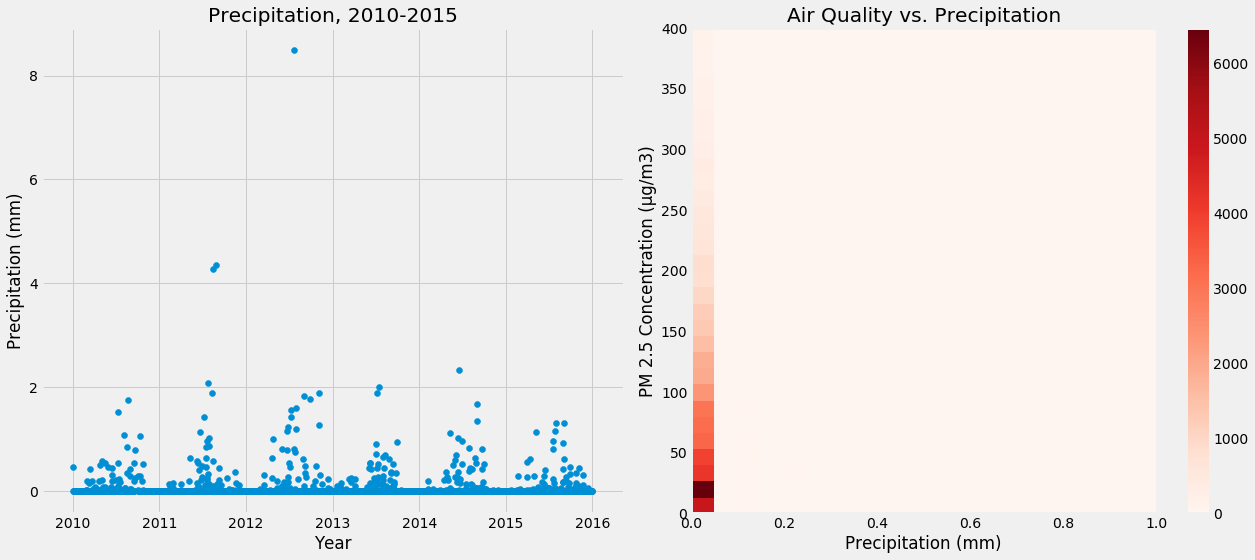

In [17]:
# Precipitation

df.precipitation[df.precipitation >= 1000] = np.nan  # Remove erroneous 999990.0 point

plt.figure()
plt.subplot(1,2,1)
plt.scatter(x = df.precipitation.resample('D').mean().index, y = df.precipitation.resample('D').mean())
plt.xlabel('Year')
plt.ylabel('Precipitation (mm)')
plt.title('Precipitation, 2010-2015')

plt.subplot(1,2,2)
plt.hist2d(x = df.precipitation, y = df.pm25,
           bins = (20, 30), range = ((0,1),(0,400)), cmap = 'Reds')
plt.colorbar()
plt.xlabel('Precipitation (mm)')
plt.ylabel('PM 2.5 Concentration (μg/m3)')
plt.title('Air Quality vs. Precipitation')
plt.tight_layout()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49056 entries, 2010-01-02 00:00:00 to 2015-12-31 23:00:00
Data columns (total 19 columns):
No                 49056 non-null int64
year               49056 non-null int64
month              49056 non-null int64
day                49056 non-null int64
hour               49056 non-null int64
season             49056 non-null int64
PM_Dongsi          25098 non-null float64
PM_Dongsihuan      23968 non-null float64
PM_Nongzhanguan    25098 non-null float64
pm25               49056 non-null float64
dew_point          49056 non-null float64
humidity           49056 non-null float64
pressure           49056 non-null float64
temp               49056 non-null float64
wind_dir           49052 non-null object
wind_speed         49056 non-null float64
precipitation      49055 non-null float64
Iprec              49056 non-null float64
weekday            49056 non-null int64
dtypes: float64(11), int64(7), object(1)
memory usage: 8.7+ MB
